#### Loading the noshowappointments dataset from Kaggle and loading it onto a Pandas dataframe

In [40]:
import kagglehub
path = kagglehub.dataset_download("joniarroba/noshowappointments")
print("path to dataset files -> {}".format(path))

path to dataset files -> C:\Users\Admin\.cache\kagglehub\datasets\joniarroba\noshowappointments\versions\5


In [41]:
import os
print(os.listdir(path))

['KaggleV2-May-2016.csv']


In [42]:
import pandas as pd
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
fullpath = os.path.join(path, csv_file)
noshow_dataset_df = pd.read_csv(fullpath)

#### Data exploratrion

In [43]:
noshow_dataset_df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [44]:
noshow_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [45]:
noshow_dataset_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Removal of features than cannot affect the outcome(i.e., whether the patient is a no show) in any way

In [46]:
noshow_dataset_df1 = noshow_dataset_df.drop(['PatientId', 'AppointmentID'], axis=1)

In [47]:
noshow_dataset_df1.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [48]:
noshow_dataset_df1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [49]:
noshow_dataset_df1.tail(100)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110427,F,2016-06-02T09:46:11Z,2016-06-08T00:00:00Z,56,RESISTÊNCIA,0,0,0,0,0,1,No
110428,F,2016-06-03T12:33:46Z,2016-06-08T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,Yes
110429,F,2016-06-07T10:12:25Z,2016-06-08T00:00:00Z,44,RESISTÊNCIA,0,0,0,0,0,0,Yes
110430,F,2016-05-25T09:01:33Z,2016-06-01T00:00:00Z,57,RESISTÊNCIA,0,0,0,0,0,0,Yes
110431,M,2016-06-03T08:45:25Z,2016-06-08T00:00:00Z,12,RESISTÊNCIA,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## converting all the columns to numeric datatypes

male values denoted by 'M' in the Gender column are encoded as 0 and female → 'F' encoded as 1

In [50]:
noshow_dataset_df1['Gender'] = noshow_dataset_df1['Gender'].apply(lambda x: 1 if x == 'F' else 0)

In [51]:
noshow_dataset_df1.keys()

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

Encoding of the No-show column:
 'Yes' encoded as 1
 'No' encoded as 0

In [52]:
noshow_dataset_df1['No-show'] = noshow_dataset_df1['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [53]:
noshow_dataset_df1.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [54]:
noshow_dataset_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  int64 
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 10.1+ MB


In [55]:
noshow_dataset_df1[['ScheduledDay', 'AppointmentDay']].tail(100)

,ScheduledDay,AppointmentDay
110427,2016-06-02T09:46:11Z,2016-06-08T00:00:00Z
110428,2016-06-03T12:33:46Z,2016-06-08T00:00:00Z
110429,2016-06-07T10:12:25Z,2016-06-08T00:00:00Z
110430,2016-05-25T09:01:33Z,2016-06-01T00:00:00Z
110431,2016-06-03T08:45:25Z,2016-06-08T00:00:00Z
...,...,...
110522,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z
110523,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z
110524,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z
110525,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z


## Feature engineering

In the cell below, the duration, in days, between schedule day and appointment day is derived and stored in a column

In [56]:
noshow_dataset_df1[['AppointmentDay', 'ScheduledDay']] = noshow_dataset_df1[['AppointmentDay', 'ScheduledDay']].apply(pd.to_datetime)
noshow_dataset_df1['WaitingDays'] = (noshow_dataset_df1['AppointmentDay'] - noshow_dataset_df1['ScheduledDay']).dt.days

In [57]:
noshow_dataset_df1['WaitingDays'].head(10000)

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9995   -1
9996   -1
9997    5
9998    5
9999    5
Name: WaitingDays, Length: 10000, dtype: int64

In [58]:
negative_wait = noshow_dataset_df1[noshow_dataset_df1['WaitingDays'] < 0]
print(f"Records with negative waiting time: {len(negative_wait)}")
print(f"Percentage of total: {len(negative_wait)/len(noshow_dataset_df1)*100:.2f}%")

Records with negative waiting time: 38568
Percentage of total: 34.89%


In [59]:
noshow_dataset_df1[noshow_dataset_df1['WaitingDays'] == -1].sample(n=10, replace=True)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
91566,1,2016-06-08 07:54:38+00:00,2016-06-08 00:00:00+00:00,26,CONSOLAÇÃO,1,0,0,0,0,0,0,-1
44139,1,2016-05-10 13:01:39+00:00,2016-05-10 00:00:00+00:00,6,REDENÇÃO,0,0,0,0,0,0,0,-1
86279,1,2016-06-07 07:58:36+00:00,2016-06-07 00:00:00+00:00,6,SANTO ANTÔNIO,0,0,0,0,0,0,0,-1
14924,0,2016-05-03 09:19:35+00:00,2016-05-03 00:00:00+00:00,17,DO QUADRO,0,0,0,0,0,0,0,-1
53505,0,2016-05-13 08:38:50+00:00,2016-05-13 00:00:00+00:00,13,PRAIA DO SUÁ,0,0,0,0,1,0,0,-1
103287,1,2016-06-06 07:57:55+00:00,2016-06-06 00:00:00+00:00,54,SANTA MARTHA,0,1,1,0,0,0,0,-1
53267,0,2016-05-11 07:46:00+00:00,2016-05-11 00:00:00+00:00,12,CONQUISTA,1,0,0,0,0,0,1,-1
94538,1,2016-06-03 07:34:03+00:00,2016-06-03 00:00:00+00:00,29,DA PENHA,1,0,0,0,0,0,0,-1
62054,0,2016-05-17 08:28:29+00:00,2016-05-17 00:00:00+00:00,36,PRAIA DO SUÁ,0,1,0,0,0,0,1,-1
33876,0,2016-05-16 07:33:14+00:00,2016-05-16 00:00:00+00:00,17,CONSOLAÇÃO,0,0,0,0,0,0,0,-1


In [60]:
noshow_dataset_df1[(noshow_dataset_df1['WaitingDays'] == -1) & (noshow_dataset_df1['No-show'] == 1)].sample(n=5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
53219,1,2016-05-11 07:44:51+00:00,2016-05-11 00:00:00+00:00,7,MARIA ORTIZ,0,0,0,0,0,0,1,-1
28350,1,2016-05-30 08:09:17+00:00,2016-05-30 00:00:00+00:00,10,SANTO ANDRÉ,0,0,0,0,0,0,1,-1
9602,1,2016-05-04 11:27:08+00:00,2016-05-04 00:00:00+00:00,77,ROMÃO,0,1,0,0,0,0,1,-1
55676,0,2016-05-13 15:31:07+00:00,2016-05-13 00:00:00+00:00,19,SANTO ANTÔNIO,1,0,0,0,0,0,1,-1
9547,0,2016-05-17 07:03:06+00:00,2016-05-17 00:00:00+00:00,20,ROMÃO,0,0,0,0,0,0,1,-1


In [61]:
print(len(noshow_dataset_df[(noshow_dataset_df1['WaitingDays'] == -1) & (noshow_dataset_df1['No-show'] == 1)])/ len(negative_wait) * 100)

4.646338933831156


some statistics,
    37% of records show negative waiting times
    of that 4% are no show appointments
conclusion:
    initially thought negative waiting times are a proxy for walk-in appointments, however, 4% no show subset disproves this, and
    now it is assumed that they are errors in data collections, and therefore going forward will be disposed

In [62]:
noshow_dataset_df1 = noshow_dataset_df1[noshow_dataset_df1['WaitingDays'] >= 0]

### issuing an integer id for each unique neighborhood

In [63]:
print(noshow_dataset_df1['Neighbourhood'].nunique())

80


80 unique neighborhoods to be converted into 80 integer ids

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
noshow_dataset_df1['Neighbourhood'] = le.fit_transform(noshow_dataset_df1['Neighbourhood'])
print("Neighbourhood lookup table:\n")
for i,class_name in enumerate(le.classes_):
    print("ID: {}, Neighborhood name: {}".format(i, class_name))

Neighbourhood lookup table:

ID: 0, Neighborhood name: AEROPORTO
ID: 1, Neighborhood name: ANDORINHAS
ID: 2, Neighborhood name: ANTÔNIO HONÓRIO
ID: 3, Neighborhood name: ARIOVALDO FAVALESSA
ID: 4, Neighborhood name: BARRO VERMELHO
ID: 5, Neighborhood name: BELA VISTA
ID: 6, Neighborhood name: BENTO FERREIRA
ID: 7, Neighborhood name: BOA VISTA
ID: 8, Neighborhood name: BONFIM
ID: 9, Neighborhood name: CARATOÍRA
ID: 10, Neighborhood name: CENTRO
ID: 11, Neighborhood name: COMDUSA
ID: 12, Neighborhood name: CONQUISTA
ID: 13, Neighborhood name: CONSOLAÇÃO
ID: 14, Neighborhood name: CRUZAMENTO
ID: 15, Neighborhood name: DA PENHA
ID: 16, Neighborhood name: DE LOURDES
ID: 17, Neighborhood name: DO CABRAL
ID: 18, Neighborhood name: DO MOSCOSO
ID: 19, Neighborhood name: DO QUADRO
ID: 20, Neighborhood name: ENSEADA DO SUÁ
ID: 21, Neighborhood name: ESTRELINHA
ID: 22, Neighborhood name: FONTE GRANDE
ID: 23, Neighborhood name: FORTE SÃO JOÃO
ID: 24, Neighborhood name: FRADINHOS
ID: 25, Neighborhoo

In [65]:
noshow_dataset_df1.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
5,1,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,57,0,1,0,0,0,0,0,1
6,1,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,25,0,0,0,0,0,0,1,1
7,1,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,25,0,0,0,0,0,0,1,1
9,1,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,12,0,0,0,0,0,0,0,1
10,1,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,50,0,0,0,0,0,0,0,1


extracting the day of the week and month for the appointment

In [67]:
noshow_dataset_df1['appointment_day_of_week'] = noshow_dataset_df1['AppointmentDay'].dt.day_name()
noshow_dataset_df1['appointment_month'] = noshow_dataset_df1['AppointmentDay'].dt.month

encoding the day of the week

In [80]:
# For KNN, you might want numerical encoding
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
noshow_dataset_df1['day_of_week_encoded'] = noshow_dataset_df1['appointment_day_of_week'].map(day_mapping)

In [77]:
noshow_dataset_df1['appointment_month'].sample(10000)

97651    6
43897    5
13052    5
39164    5
11344    5
        ..
60697    5
17999    5
50542    5
91477    6
50803    5
Name: appointment_month, Length: 10000, dtype: int32

In [79]:
noshow_dataset_df1[['appointment_month','AppointmentDay']].sample(20)

,appointment_month,AppointmentDay
8152,5,2016-05-13 00:00:00+00:00
60330,5,2016-05-06 00:00:00+00:00
106159,6,2016-06-06 00:00:00+00:00
108930,6,2016-06-02 00:00:00+00:00
90573,6,2016-06-08 00:00:00+00:00
105351,6,2016-06-03 00:00:00+00:00
31704,5,2016-05-09 00:00:00+00:00
103360,6,2016-06-08 00:00:00+00:00
55792,5,2016-05-05 00:00:00+00:00
32568,5,2016-05-12 00:00:00+00:00


removing unnecessary features

In [81]:
noshow_dataset_df1.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,appointment_day_of_week,appointment_month,day_of_week_encoded
39928,1,2016-05-19 13:15:07+00:00,2016-05-30 00:00:00+00:00,21,15,1,0,0,0,0,1,0,10,Monday,5,0
30443,0,2016-05-02 14:31:39+00:00,2016-05-09 00:00:00+00:00,71,10,0,0,0,0,0,0,1,6,Monday,5,0
32914,1,2016-05-05 16:14:30+00:00,2016-05-12 00:00:00+00:00,57,55,0,1,0,0,0,1,0,6,Thursday,5,3
104829,1,2016-06-03 07:06:26+00:00,2016-06-07 00:00:00+00:00,61,38,0,0,0,0,0,1,1,3,Tuesday,6,1
1390,1,2016-04-12 17:38:37+00:00,2016-04-29 00:00:00+00:00,38,43,0,0,0,0,0,1,0,16,Friday,4,4


In [83]:
final_df = noshow_dataset_df1.drop(['ScheduledDay', 'AppointmentDay', 'appointment_day_of_week'], axis=1)
print(final_df.columns)

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'WaitingDays', 'appointment_month', 'day_of_week_encoded'],
      dtype='object')


## Model Training and Evaluation

initial model training

In [84]:
X = final_df[['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'WaitingDays', 'appointment_month', 'day_of_week_encoded']]
y = final_df['No-show']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
kcl = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [90]:
print(kcl.score(X_test, y_test))

0.6663146192329071


parameter fine tuning
            → finding the ideal number of n_neighbours to create a model thats 70-90% accurate

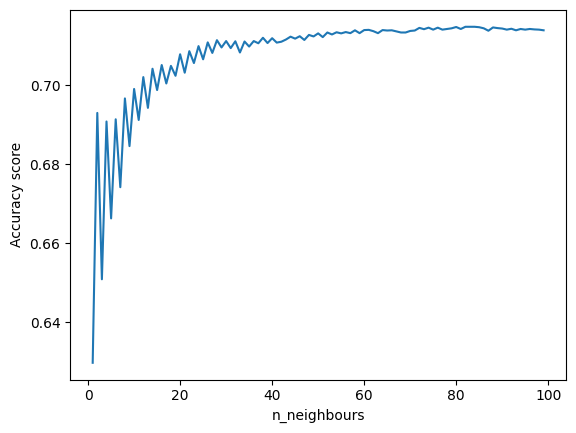

In [101]:
import matplotlib.pyplot as plt
testing_accuracy = []
neighbours = range(1, 100, 1)

for n in neighbours:
    kcl = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    testing_accuracy.append(kcl.score(X_test, y_test))

plt.plot(neighbours, testing_accuracy, label='testing_accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_neighbours')
plt.show()

In [102]:
print(testing_accuracy)

[0.6297943301834352, 0.6929961089494163, 0.650917176209005, 0.69082823790995, 0.6663146192329071, 0.6913841022790439, 0.6742078932740412, 0.6966648137854363, 0.6846025569760978, 0.6990550305725403, 0.6912173429683157, 0.7020566981656475, 0.6942745969983324, 0.7041689827682046, 0.6987770983879933, 0.7051139521956643, 0.7004446914952751, 0.7048916064480267, 0.7023902167871039, 0.7078376876042246, 0.7031684269038355, 0.7086158977209561, 0.7056142301278489, 0.7098943857698722, 0.7065591995553085, 0.7108393551973319, 0.708171206225681, 0.7113952195664258, 0.7095608671484158, 0.7111728738187882, 0.7093941078376876, 0.7111172873818788, 0.7082823790994998, 0.7110617009449695, 0.7097832128960534, 0.7111728738187882, 0.7106170094496943, 0.7120066703724292, 0.7106725958866037, 0.7118954974986104, 0.7107837687604225, 0.7110061145080601, 0.711561978877154, 0.7122846025569761, 0.7117843246247916, 0.7123957754307949, 0.7114508060033352, 0.7127292940522513, 0.7123401889938855, 0.713118399110617, 0.712